<a href="https://colab.research.google.com/github/ZenoZoldyck/Kaggle_competions/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

tf.__version__

'2.5.0'

In [47]:
# importing datasets

train = pd.read_excel("/content/train_nn.xlsx")
test = pd.read_csv("/content/test_n.csv")

In [48]:
# viewing the train data
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [49]:
test.head(11)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [50]:
# time to preprocess the data

ct = make_column_transformer(
    (MinMaxScaler(), ["Pclass", "Age", "SibSp", "Parch", "Fare"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["Sex", "Embarked"])
)

X = train.drop(["Survived"], axis = 1)
y = train["Survived"]

ct.fit(X)
X = ct.fit_transform(X)
test_data = ct.fit_transform(test)

In [51]:
X[0]

array([1.        , 0.27117366, 0.125     , 0.        , 0.01415106,
       0.        , 1.        , 0.        , 0.        , 1.        ])

In [52]:
import numpy as np
y = np.array(y)

In [53]:
test_data[0]

array([1.        , 0.4527232 , 0.        , 0.        , 0.01528158,
       0.        , 1.        , 0.        , 1.        , 0.        ])

In [54]:
X.shape, y.shape

((889, 10), (889,))

In [68]:
# creating train and test dataset

X_train = X
y_train = y

In [69]:
# Time for model creation
model_5 = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation = "relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation = "relu"),
   tf.keras.layers.Dense(1, activation = "sigmoid")                          
])
model_5.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
history = model_5.fit(X_train, y_train, epochs = 400)

Epoch 1/400
28/28 [==============================] - 0s 971us/step - loss: 0.2185 - accuracy: 0.6828
Epoch 2/400
28/28 [==============================] - 0s 907us/step - loss: 0.1798 - accuracy: 0.7604
Epoch 3/400
28/28 [==============================] - 0s 937us/step - loss: 0.1604 - accuracy: 0.7840
Epoch 4/400
28/28 [==============================] - 0s 968us/step - loss: 0.1529 - accuracy: 0.7840
Epoch 5/400
28/28 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.8020
Epoch 6/400
28/28 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.7930
Epoch 7/400
28/28 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.8043
Epoch 8/400
28/28 [==============================] - 0s 975us/step - loss: 0.1459 - accuracy: 0.8110
Epoch 9/400
28/28 [==============================] - 0s 988us/step - loss: 0.1436 - accuracy: 0.8054
Epoch 10/400
28/28 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.79

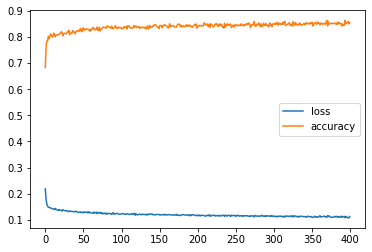

In [70]:
pd.DataFrame(history.history).plot()

In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                352       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [72]:
y_preds = model.predict(test_data)

In [73]:
y_preds[10]

array([0.0957014], dtype=float32)

In [74]:
y_val = y_preds.round()
len(y_val)

418

In [81]:
abc = pd.DataFrame(y_val)

In [82]:
abc.to_csv("here_we_go.csv")